In [76]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_pickle('../data/highered.pkl')
data_dict = pd.read_pickle('../data/data_dictionary.pkl')

In [78]:
df.shape

(531216, 126)

In [79]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

PERSONID  YEAR    WEIGHT  SAMPLE  SURID  MRDG  MR03Y5  NMRMEDR  \
0  50000030000000003  2003  372.6047     601      1     1    1981   719995   
1  50000030000000004  2003  341.7484     601      1     1    1961   719995   
2  50000030000000005  2003  522.5629     601      1     1    1966   799995   
3  50000030000000006  2003  135.0212     601      1     2    1996   298895   
4  50000030000000104  2003  907.4463     601      1     2    1976   438995   

   NMRMEMG  LFSTAT  ...  ICCOMM  ICTRLA  ICTRLH  ICWBVT  NWFAM  NWLAY  NWNOND  \
0        7       1  ...     NaN     NaN     NaN     NaN     98     98      98   
1        7       1  ...     NaN     NaN     NaN     NaN     98     98      98   
2        7       1  ...     NaN     NaN     NaN     NaN     98     98      98   
3        2       1  ...     NaN     NaN     NaN     NaN     98     98      98   
4        4       3  ...     NaN     NaN     NaN     NaN      0      0       0   

   NWOCNA  NWOTP  NWSTU  
0      98     98     98  
1      98     98     98  
2      98     98     98  
3      98     98     98  
4       0      1      0  

[5 rows x 125 columns]

In [80]:
df.isnull().sum()

PERSONID    0
YEAR        0
WEIGHT      0
SAMPLE      0
SURID       0
           ..
NWLAY       0
NWNOND      0
NWOCNA      0
NWOTP       0
NWSTU       0
Length: 125, dtype: int64

In [81]:
df.describe()

PERSONID           YEAR         WEIGHT         SAMPLE  \
count  5.312160e+05  531216.000000  531216.000000  531216.000000   
mean   6.791717e+16    2008.132820     232.275293     806.921324   
std    4.380479e+16       3.438795     409.307824     142.622619   
min    2.000000e+16    2003.000000       0.369800     601.000000   
25%    2.000904e+16    2006.000000      29.106000     701.000000   
50%    5.000004e+16    2008.000000     101.752800     801.000000   
75%    1.101000e+17    2010.000000     262.868850     902.000000   
max    1.401011e+17    2013.000000   14782.721400    1002.000000   

               SURID           MRDG         MR03Y5        NMRMEDR  \
count  531216.000000  531216.000000  531216.000000  531216.000000   
mean        1.485305       2.001598    1989.843124  475942.620032   
std         0.668826       0.943027      38.762857  181563.579399   
min         1.000000       1.000000    1950.000000  198895.000000   
25%         1.000000       1.000000    1981.000000  318730.000000   
50%         1.000000       2.000000    1991.000000  459395.000000   
75%         2.000000       3.000000    2001.000000  611995.000000   
max         3.000000       5.000000    9999.000000  999999.000000   

             NMRMEMG         LFSTAT  ...         ICCOMM         ICTRLA  \
count  531216.000000  531216.000000  ...  105064.000000  105064.000000   
mean        4.230213       1.268002  ...      78.818787      78.703562   
std         1.824249       0.659893  ...      38.644287      38.876939   
min         1.000000       1.000000  ...       0.000000       0.000000   
25%         3.000000       1.000000  ...      98.000000      98.000000   
50%         4.000000       1.000000  ...      98.000000      98.000000   
75%         6.000000       1.000000  ...      98.000000      98.000000   
max         9.000000       3.000000  ...      98.000000      98.000000   

              ICTRLH         ICWBVT          NWFAM          NWLAY  \
count  105064.000000  105064.000000  531216.000000  531216.000000   
mean       78.736189      78.732601      83.484483      83.475526   
std        38.811236      38.818469      34.777917      34.799282   
min         0.000000       0.000000       0.000000       0.000000   
25%        98.000000      98.000000      98.000000      98.000000   
50%        98.000000      98.000000      98.000000      98.000000   
75%        98.000000      98.000000      98.000000      98.000000   
max        98.000000      98.000000      98.000000      98.000000   

              NWNOND         NWOCNA          NWOTP          NWSTU  
count  531216.000000  531216.000000  531216.000000  531216.000000  
mean       83.492984      83.481531      83.551228      83.478790  
std        34.757625      34.784960      34.618224      34.791497  
min         0.000000       0.000000       0.000000       0.000000  
25%        98.000000      98.000000      98.000000      98.000000  
50%        98.000000      98.000000      98.000000      98.000000  
75%        98.000000      98.000000      98.000000      98.000000  
max        98.000000      98.000000      98.000000      98.000000  

[8 rows x 125 columns]

In [82]:
df2 = df.copy()
cols_to_drop = ['WEIGHT','SAMPLE','SURID','WRKG','WRKGP','EMUS','FSAGR','FSDED','FSDK','FSDOD','FSDOE','FSDOT','FSEPA','FSHHS',
                'FSNASA','FSNIH','FSNSF','FSOT','MR03Y5','ICCOMM','ICTRLA','ICTRLH','ICWBVT','NWFAM','NWLAY','NWNOND','NEWBUS',
				'NWOCNA','NWOTP','NWSTU','SPNAT','SPOT','SPSOC','MGRNAT','MGROTH','MGRSOC','WTREASN','WTRADV','WTRCHG','WTRCHOC',
				'WTREM','WTRLIC','WTRNEW','WTROPPS','WTROT','WTRPERS','WTRSKL','WTAPRF','WTMGT','WTOT','WTTECH','SATADV','SATBEN',
				'SATCHAL','SATIND','SATLOC','SATRESP','SATSAL','SATSEC','SATSOC','NRREA','NRSEC'
				]

df2 = df2.drop(cols_to_drop, axis=1)
print(df2.shape)
df2.head()

(531216, 63)


PERSONID  YEAR  MRDG  NMRMEDR  NMRMEMG  LFSTAT  FPTIND  EMSMI  \
0  50000030000000003  2003     1   719995        7       1     1.0    NaN   
1  50000030000000004  2003     1   719995        7       1     1.0    NaN   
2  50000030000000005  2003     1   799995        7       1     1.0    NaN   
3  50000030000000006  2003     2   298895        2       1     1.0    NaN   
4  50000030000000104  2003     2   438995        4       3    98.0    NaN   

   HRSWKGR  WKSWKGR  ...  CHCHG  CHCON  CHFAM  CHLAY  CHLOC  CHOT  CHPAY  \
0        3        3  ...    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
1        3        4  ...    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
2        4        4  ...    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
3        4        4  ...    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
4       98       98  ...    NaN    NaN    NaN    NaN    NaN   NaN    NaN   

   CHRET  CHSCH  ICOLLAB  
0    NaN    NaN      NaN  
1    NaN    NaN      NaN  
2    NaN    NaN      NaN  
3    NaN    NaN      NaN  
4    NaN    NaN      NaN  

[5 rows x 63 columns]

## Investigating Variables

We will investigate different variables of interest and assess if they are relevant to the model or not.

### EMSEC: Employer sector. 

1 = 2 year college or other school system, 2 = 4 year college or medical institution, 3 = Government, 4 = Business or industry, 5 = Non-US government, 98 = Logical Skip.

In [83]:
df2.groupby(['EMSEC'])['EMSEC'].count()

EMSEC
1      34260
2      90334
3      53412
4     274398
98     78812
Name: EMSEC, dtype: int64

We will drop the 'skip' values for this column and all proceeding columns with that value, as it does not add any meaningful analysis. We will drop EMSEC values of 5 as well, since we are not interested in a non-US government employment type.

In [84]:
df2 = df2[df2['EMSEC'].isin([1,2,3,4])]
df2.shape

(452404, 63)

### LFSTAT: Labor force status.
1 = employed, 2 = unemployed, 3 = not in labor force.

In [85]:
df2.groupby(['LFSTAT'])['LFSTAT'].count()

LFSTAT
1    452404
Name: LFSTAT, dtype: int64

We will drop values 2 and 3, since we are only interested in survey respondents who were employed at the time of the survey.

In [86]:
df2 = df2[df2['LFSTAT'] == 1]
df2.shape

(452404, 63)

### GOVSUP: Federal government support indicator.
0 = no, 1 = yes.

In [87]:
df2.groupby(['GOVSUP'])['GOVSUP'].count()

GOVSUP
0     346408
1     102498
98      3498
Name: GOVSUP, dtype: int64

In [88]:
df2 = df2[df2['GOVSUP'] != 98]
df2.shape

(448906, 63)

### MRDG: Type of degree, most recent degree.
1 = Bachelor's, 2 = Master's, 3 = Doctorate, 4 = Professional, 5 = Other.

In [89]:
df2.groupby(['MRDG'])['MRDG'].count()

MRDG
1    172121
2    117429
3    137244
4     21373
5       739
Name: MRDG, dtype: int64

We will drop 1, 2, 4, and 5, since we are only interested in respondents with a doctorate.

In [90]:
df2 = df2[df2['MRDG'] == 3]
df2.shape

(137244, 63)

### FPTIND:	Full-time/part-time status

1 = full-time, 2 = part-time

In [91]:
df2.groupby(['FPTIND'])['FPTIND'].count()

FPTIND
1.0    24208
2.0     2617
Name: FPTIND, dtype: int64

We will keep only full-time working repsondents.

In [92]:
df2 = df2[df2['FPTIND'] == 1]
df2.shape

(24208, 63)

### SALARY: Salary (annualized)

In [93]:
df['SALARY'].min()

0.0

In [94]:
df['SALARY'].max()

9999998.0

The max value indicates a missing value. We will remove it.

In [95]:
df2 = df2[df2['SALARY'] == df2['SALARY'].max()]
df2.shape

(2075, 63)

In [96]:
cols_to_drop_98 = ['OCEDRLP']

In [97]:
df.shape

(531216, 125)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531216 entries, 0 to 531215
Columns: 125 entries, PERSONID to NWSTU
dtypes: float64(67), int64(58)
memory usage: 506.6 MB


In [99]:
# finding columns in the df which have any null/na values
np.where(pd.isna(df))

(array([     0,      0,      0, ..., 531215, 531215, 531215]),
 array([ 12,  13,  16, ..., 116, 117, 118]))

In [100]:
df2[df2['SALARY']==df2['SALARY'].max()]['SALARY'].count()

2075

In [101]:
var = 'SALARY'
data_dict[var]['var_desc_short']

'Salary (annualized)'

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 2075.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([149999.5 , 149999.52, 149999.54, 149999.56, 149999.58, 149999.6 ,
        149999.62, 149999.64, 149999.66, 149999.68, 149999.7 , 149999.72,
        149999.74, 149999.76, 149999.78, 149999.8 , 149999.82, 149999.84,
        149999.86, 149999.88, 149999.9 , 149999.92, 149999.94, 149999.96,
        149999.98, 150000.  , 150000.02, 150000.04, 150000.06, 150000.08,
        150000.1 , 150000.12, 150000.14, 150000.16, 150000.18, 150000.2 ,
        150000.22, 150000.24, 150000.26, 150000.28, 150000.3 , 150000.32,
        150000.34, 150000.36, 150000.38, 150000.4 , 150000.42, 150000.44,
        

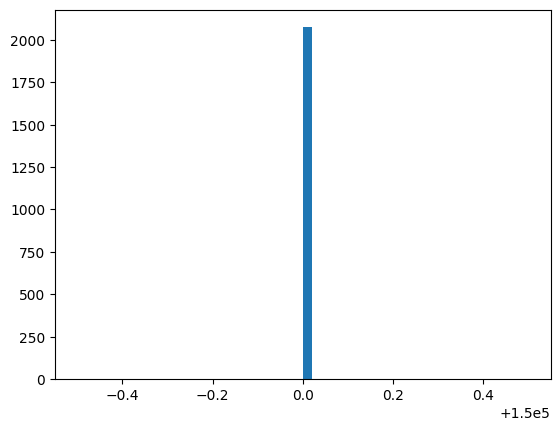

In [102]:
plt.hist(df2['SALARY'], bins=50)

In [103]:
# df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
#               xlabelsize=8, ylabelsize=8, grid=False)

# command to give space b/t diff. plots 
# plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

In [104]:
df.columns

Index(['PERSONID', 'YEAR', 'WEIGHT', 'SAMPLE', 'SURID', 'MRDG', 'MR03Y5',
       'NMRMEDR', 'NMRMEMG', 'LFSTAT',
       ...
       'ICCOMM', 'ICTRLA', 'ICTRLH', 'ICWBVT', 'NWFAM', 'NWLAY', 'NWNOND',
       'NWOCNA', 'NWOTP', 'NWSTU'],
      dtype='object', length=125)

In [105]:
def plot_histogram(df, colname, data_dict):
    # setting variables
    desc = data_dict[colname]['var_desc_short']
    vals = data_dict[colname]['data_values']
    # plotting figure
    plt.figure(figsize=(20,10))
    plt.hist(df[colname])
    plt.xlabel(f'Value of {colname} ({vals})')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of values in {colname} ({desc})')
    plt.savefig(f'../img/eda/{colname}_hist.jpeg',dpi=900)
    plt.show()

In [106]:
# for col in df.columns:
#     plot_histogram(df, col, data_dict)

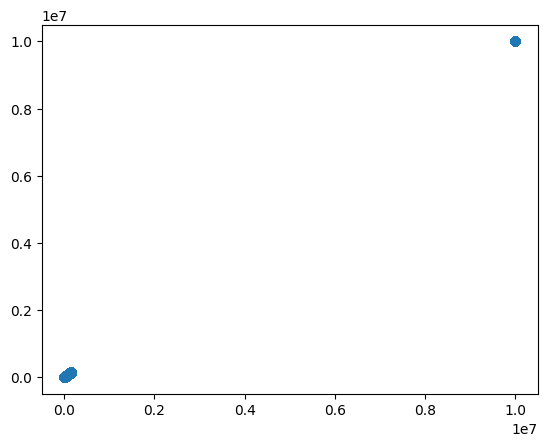

In [107]:
plt.scatter(df[colname],df[colname])

In [108]:
df.columns[10:]

Index(['WRKG', 'FPTIND', 'WRKGP', 'EMSMI', 'HRSWKGR', 'WKSWKGR', 'JOBINS',
       'JOBPENS', 'JOBPROFT', 'JOBVAC',
       ...
       'ICCOMM', 'ICTRLA', 'ICTRLH', 'ICWBVT', 'NWFAM', 'NWLAY', 'NWNOND',
       'NWOCNA', 'NWOTP', 'NWSTU'],
      dtype='object', length=115)

In [109]:
df[df['SALARY']!=9999998.0]['SALARY']

0          35000.0
1          66000.0
2         102000.0
3          81000.0
5         100000.0
            ...   
531211     98000.0
531212     93000.0
531213     95000.0
531214     43000.0
531215     69000.0
Name: SALARY, Length: 452404, dtype: float64

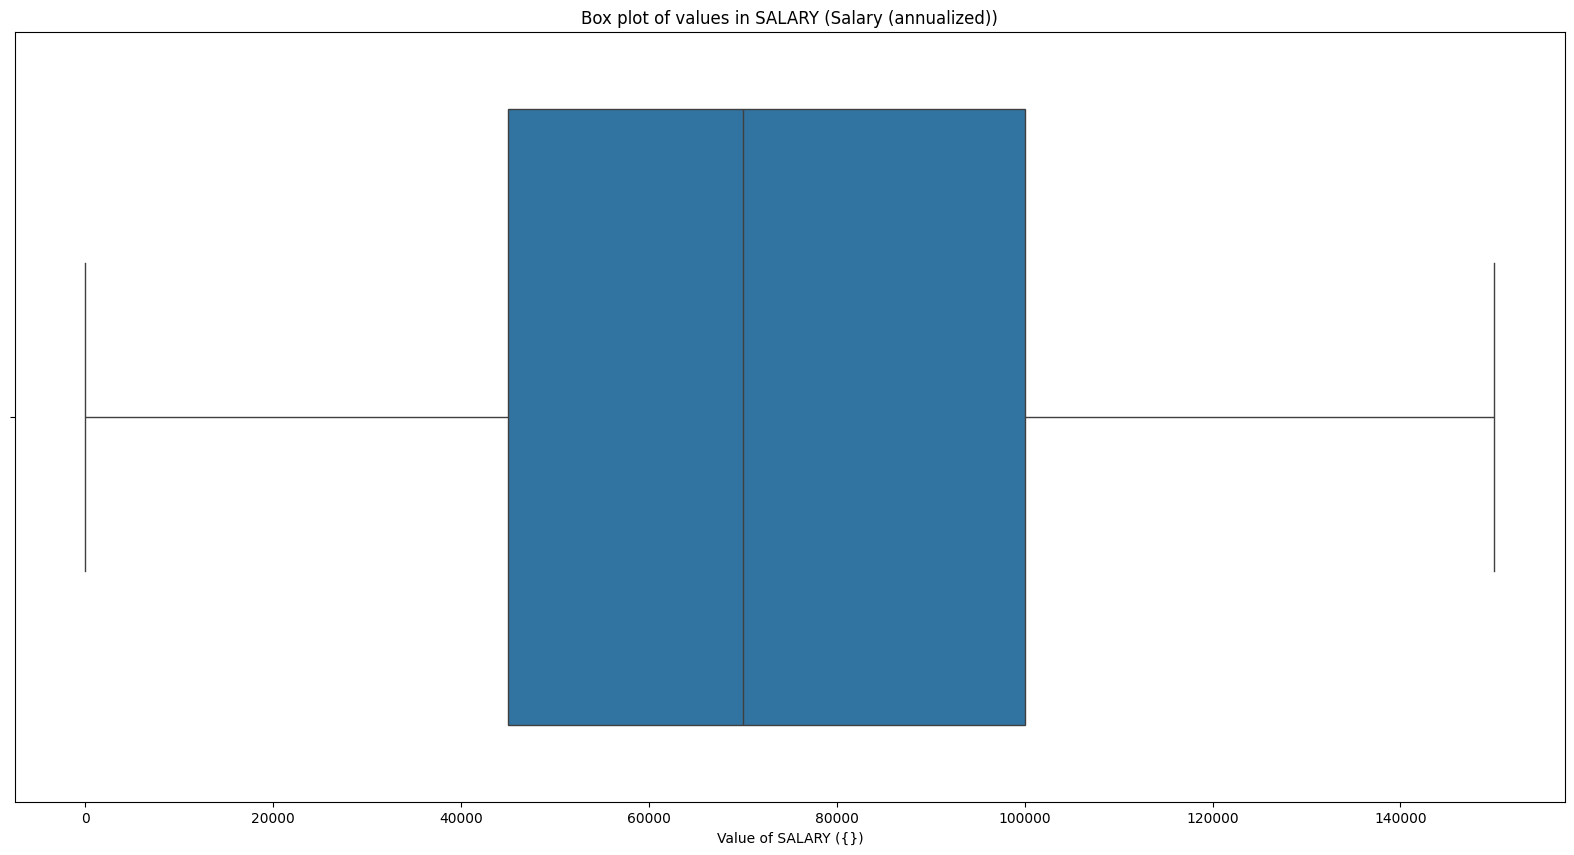

In [110]:
colname = 'SALARY'
# setting variables
desc = data_dict[colname]['var_desc_short']
vals = data_dict[colname]['data_values']
# plotting figure
plt.figure(figsize=(20,10))
sns.boxplot(df[df['SALARY']!=9999998.0]['SALARY'],orient='h')
plt.xlabel(f'Value of {colname} ({vals})')
# plt.ylabel('Frequency')
plt.title(f'Box plot of values in {colname} ({desc})')
# plt.savefig(f'../img/eda/{colname}_hist.jpeg',dpi=900)
plt.show()

In [111]:
import matplotlib
corr = df.corr()
corr.style.background_gradient('coolwarm')

In [117]:
corr = df.corr()

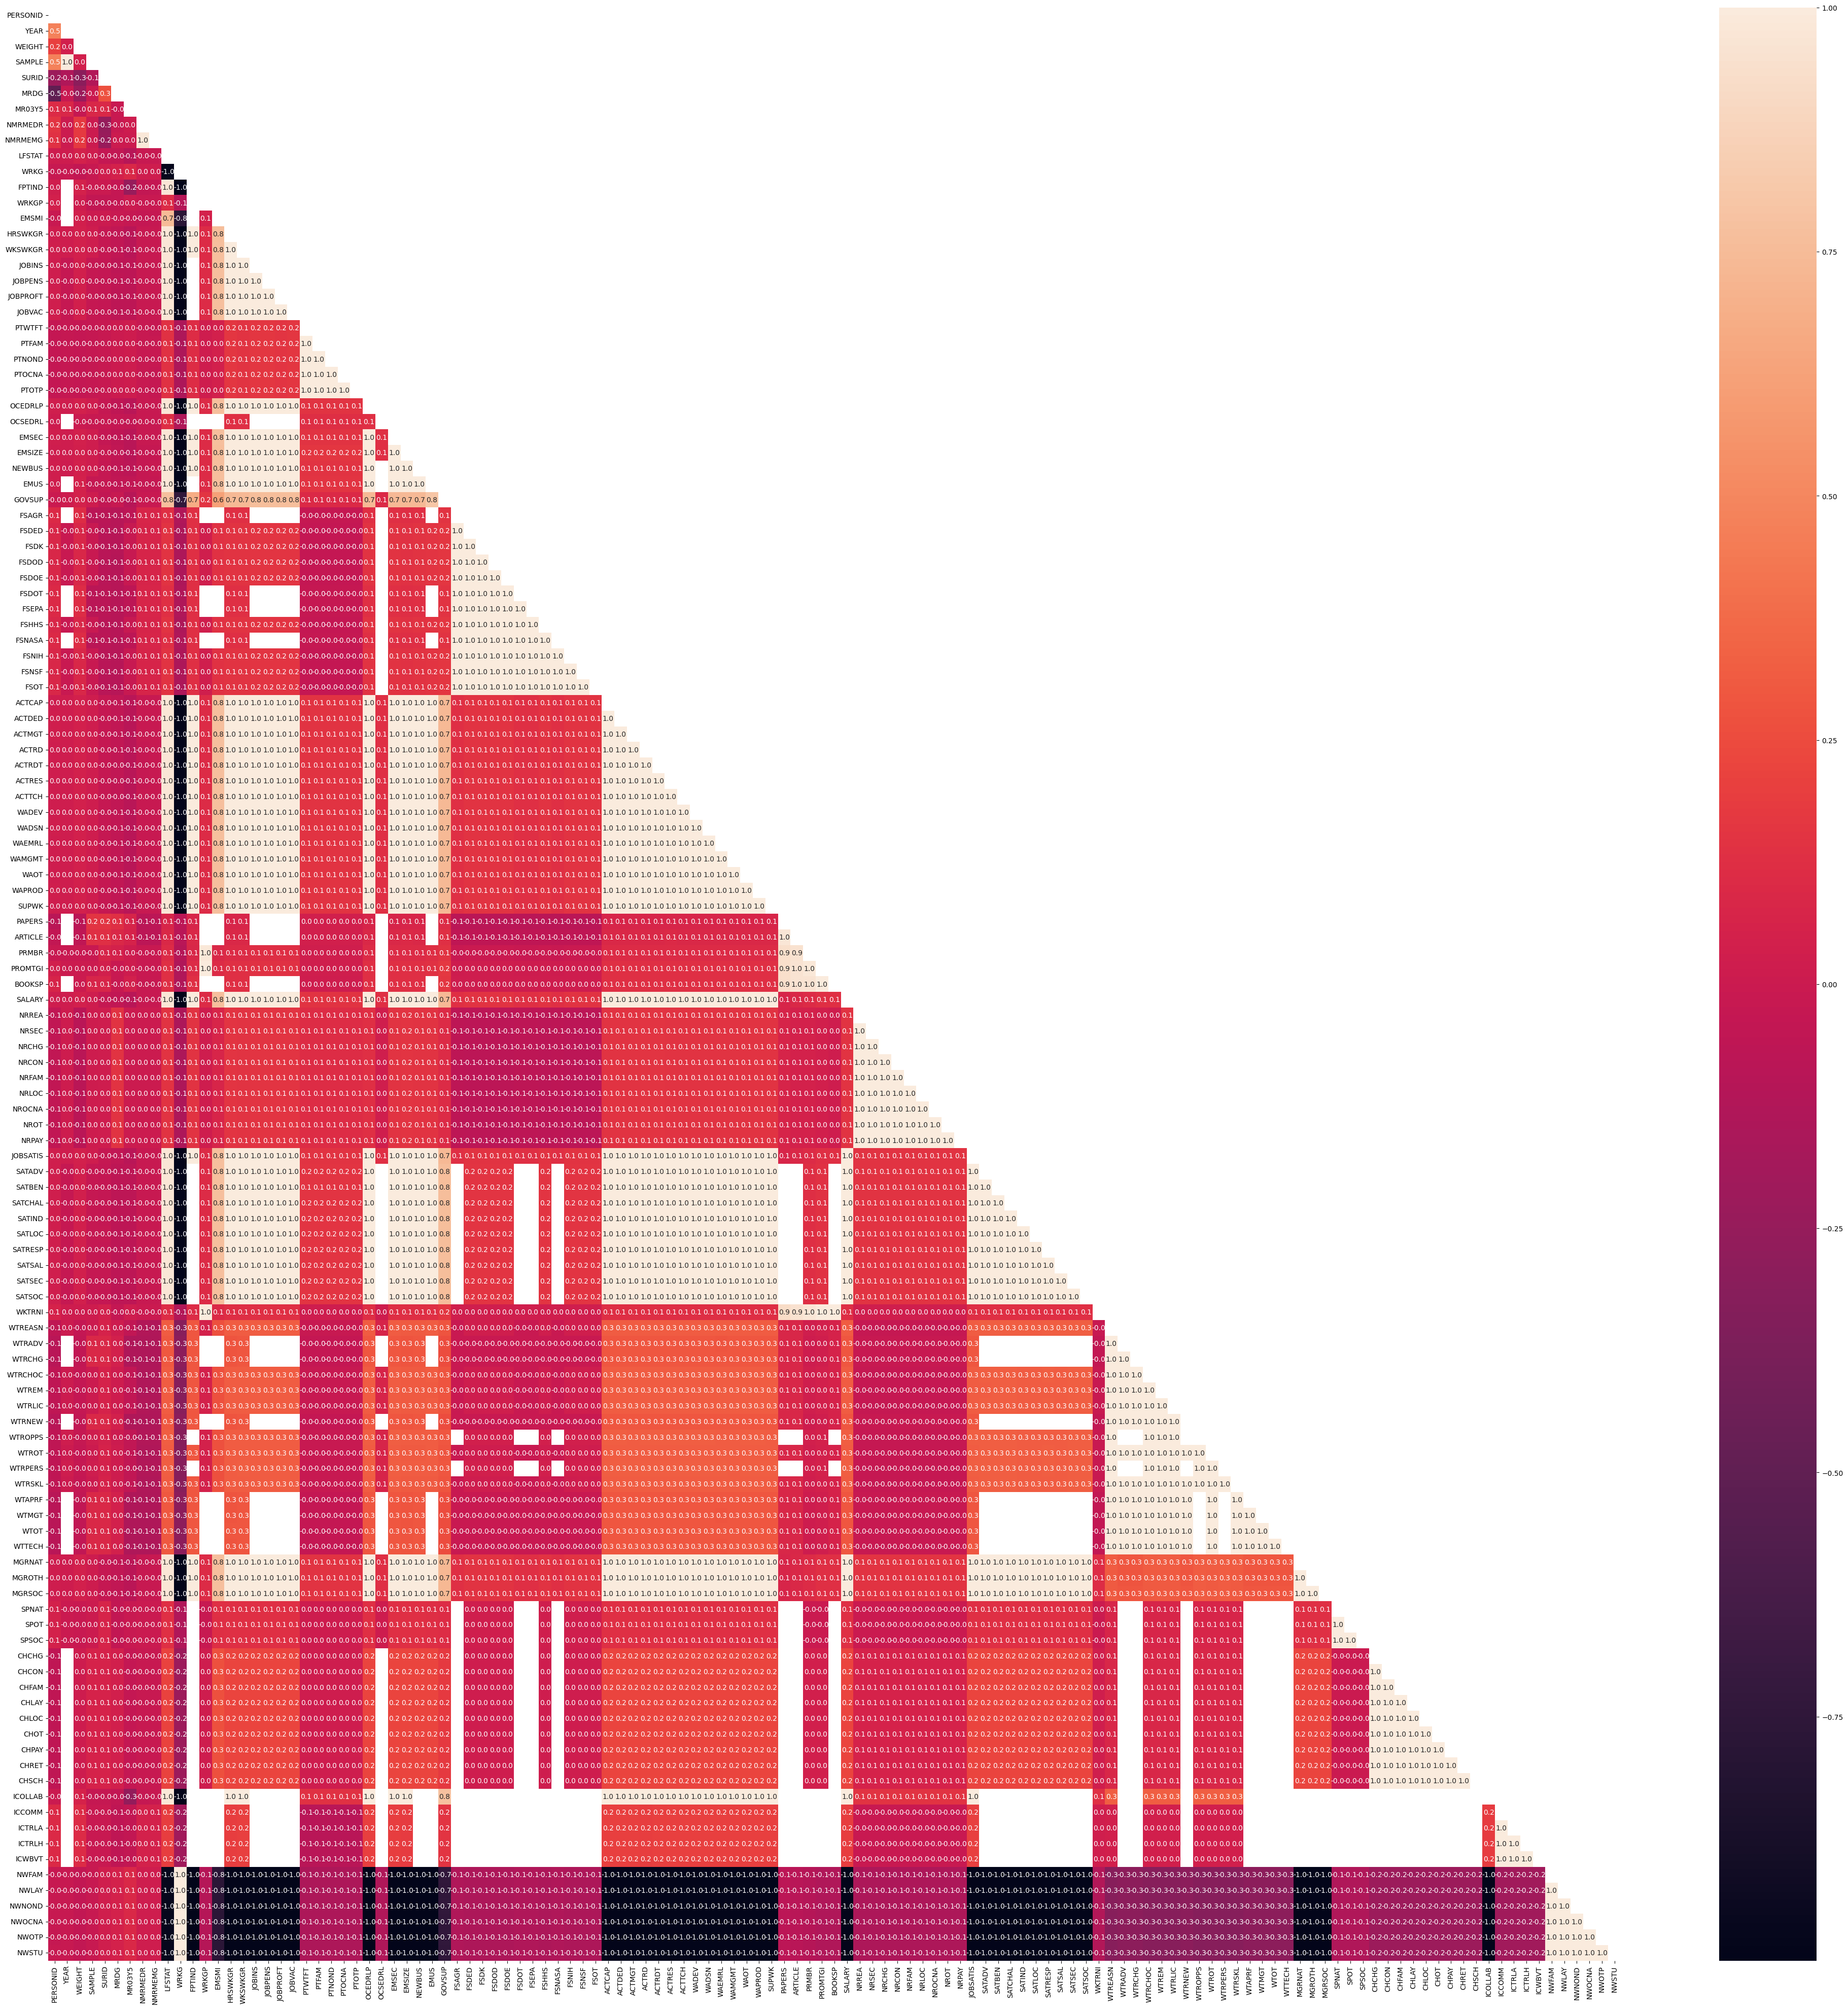

In [122]:

# applying mask
mask = np.triu(np.ones_like(corr))
 
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(corr, mask=mask,
            annot=True, fmt='0.1f')
corr.style.background_gradient('coolwarm')

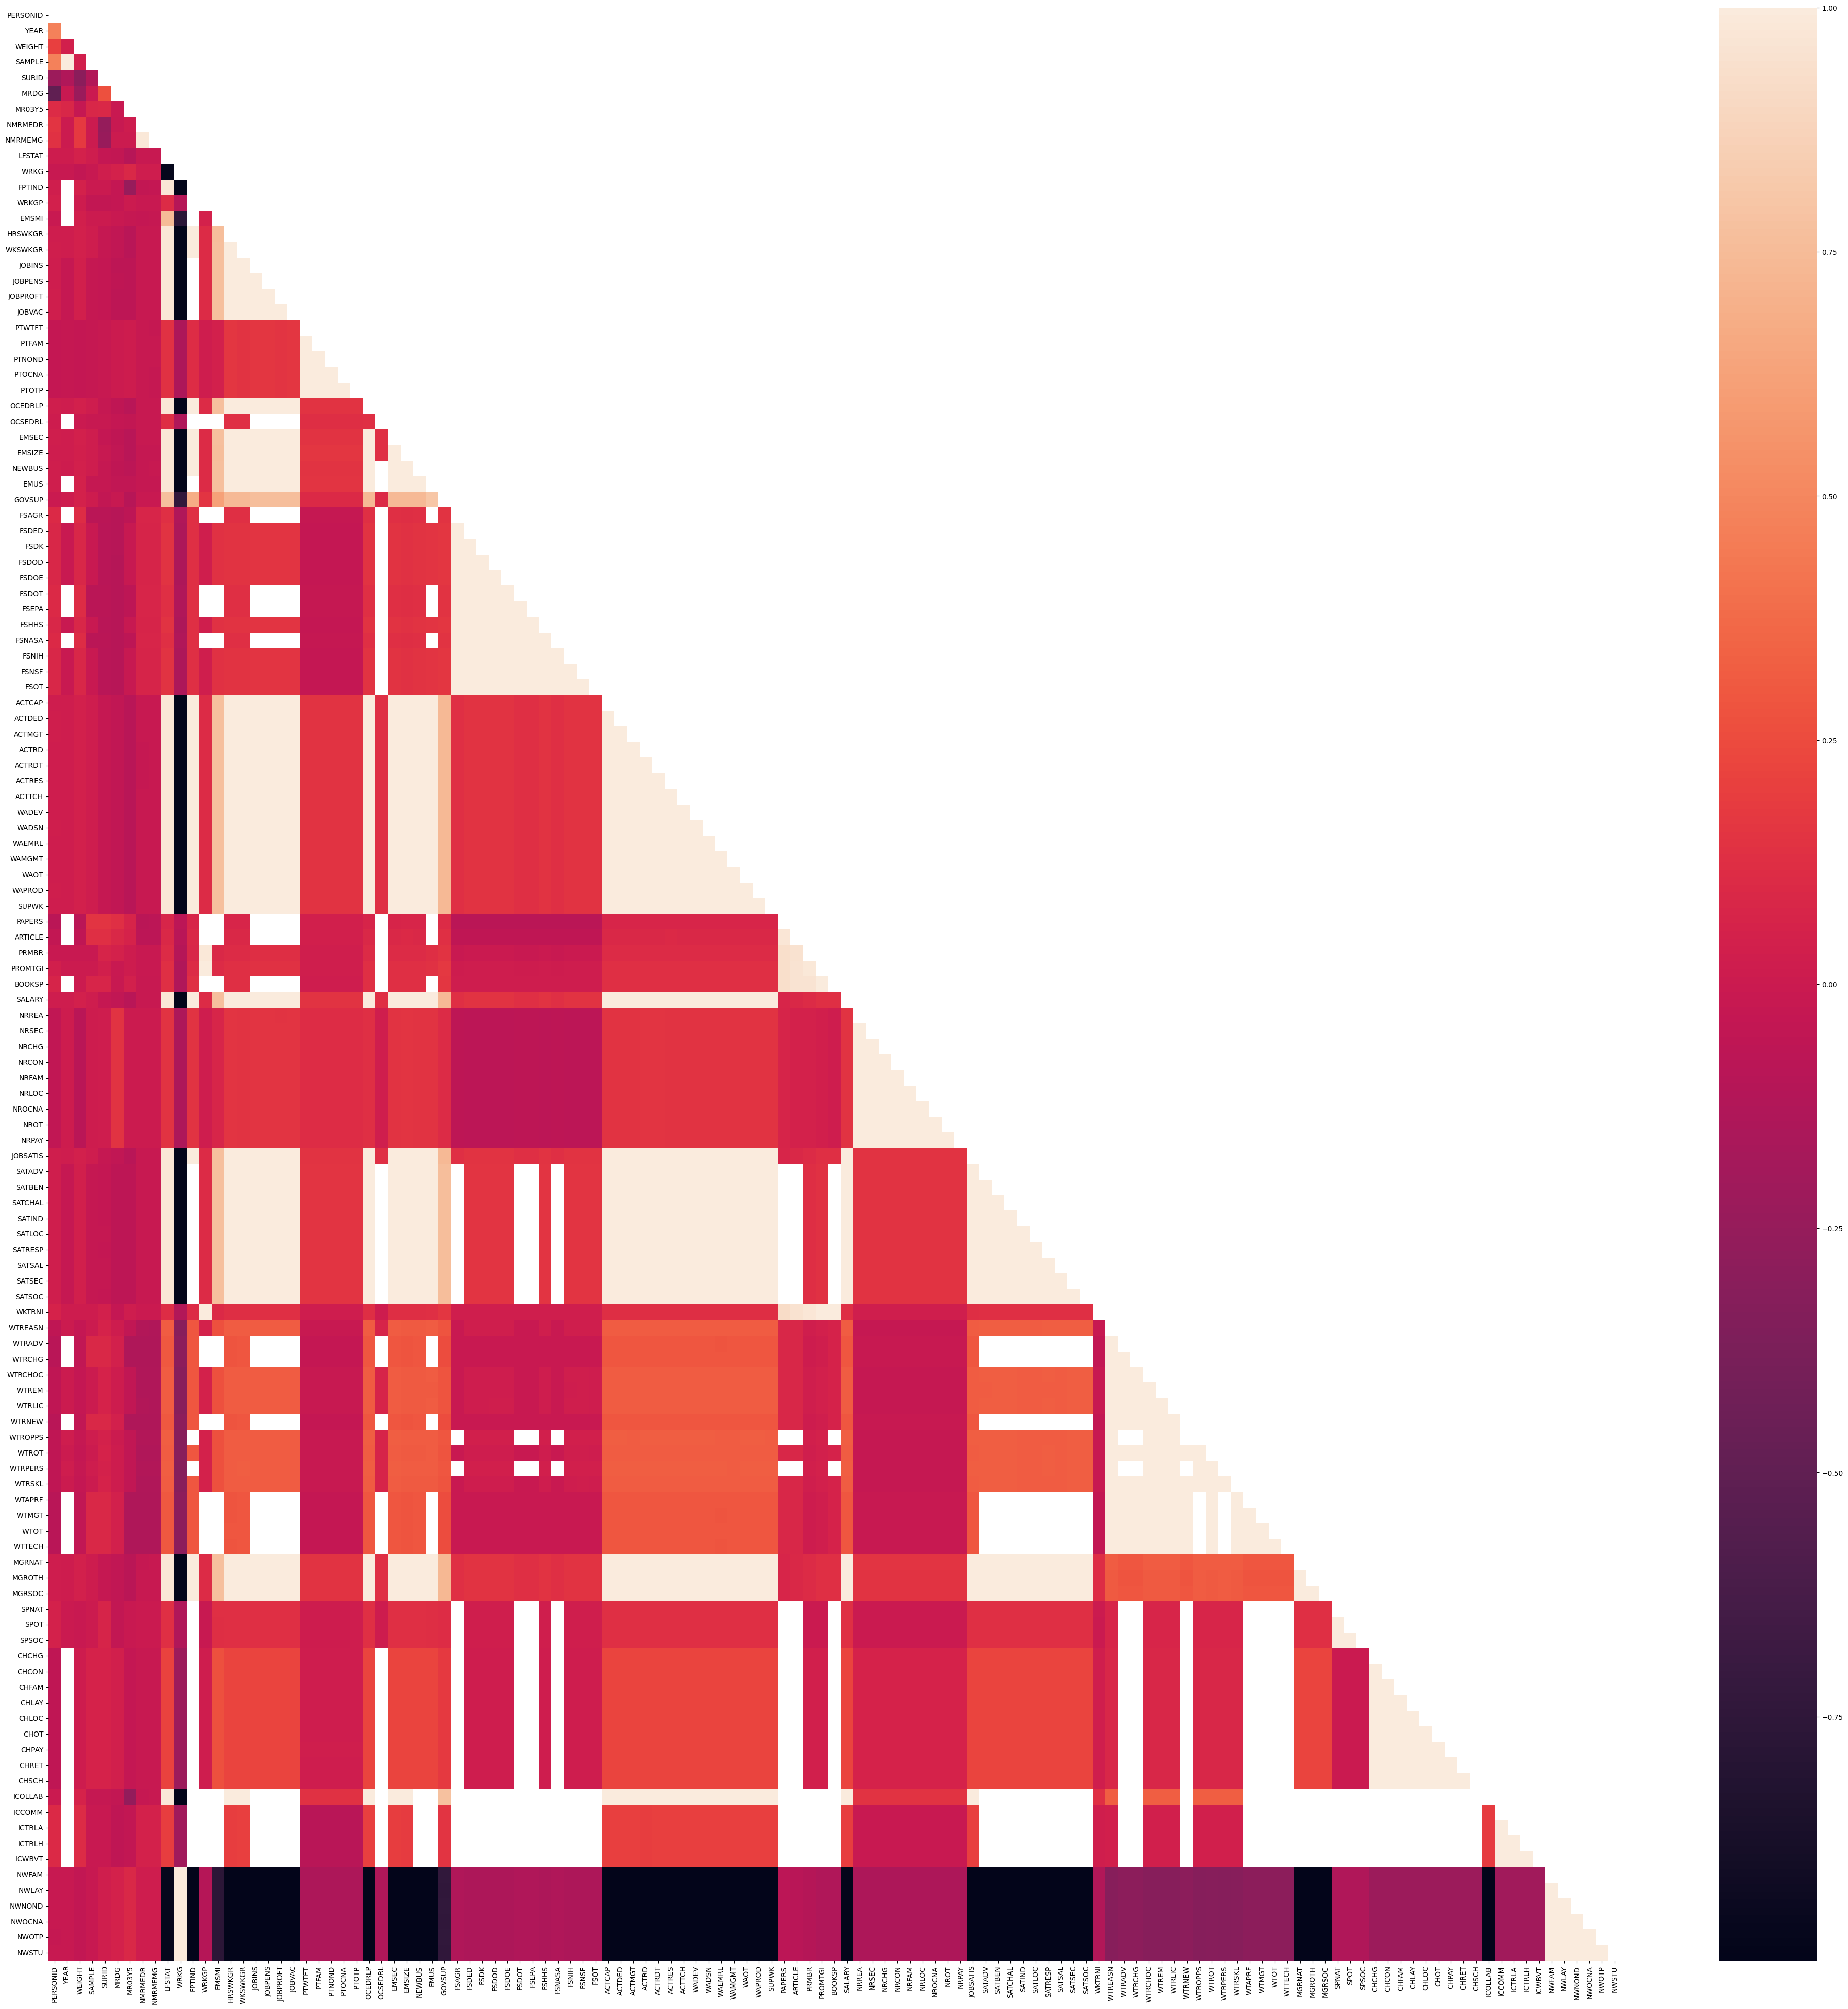

In [118]:
# applying mask
mask = np.triu(np.ones_like(corr))
 
# plotting a triangle correlation heatmap
plt.figure(figsize=(50,50))
sns.heatmap(corr, mask=mask)
corr.style.background_gradient('coolwarm')
# displaying heatmap
plt.show()

In [112]:
len(df['PERSONID'].unique())

244071

In [113]:
from sklearn.cluster import KMeans

In [114]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(df)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values